In [1]:
import numpy as np
import pymc3 as pm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
SMC_STEPS = 10000
MET_STEPS = 10000
SEED = 428

# Data Generation

In [3]:
def generate_X1(size=100, random_state=SEED):
    rand = np.random.RandomState(random_state)
    mu = rand.normal(loc=0, scale=2, size=size)
    x1 = [rand.normal(loc=m, scale=6) for m in mu]
    return np.array(x1)


def generate_X2(size=100, random_state=SEED):
    rand = np.random.RandomState(random_state)
    mu = rand.normal(loc=0, scale=2, size=size)
    sigma = rand.normal(loc=6, scale=2, size=size)
    x2 = [rand.normal(loc=m, scale=s) for m, s in zip(mu, sigma)]
    return np.array(x2)

In [4]:
x1 = generate_X1()
x2 = generate_X2()

Text(0.5,0,'X2')

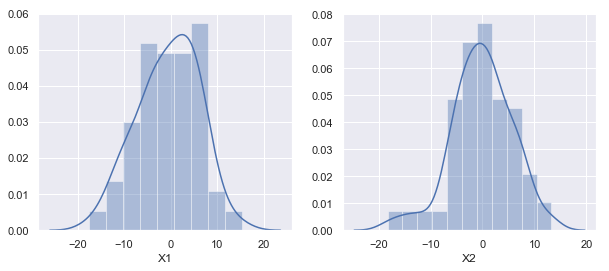

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.distplot(x1, ax=ax[0])
ax[0].set_xlabel("X1")

sns.distplot(x2, ax=ax[1])
ax[1].set_xlabel("X2")

# Models

## Model 1

In [ ]:
with pm.Model() as model_x1_m1:
    mu = pm.Uniform('mu', lower=-3, upper=3)
    obs = pm.Normal('obs', mu=mu, sigma=5, observed=x1)


with pm.Model() as model_x2_m1:
    mu = pm.Uniform('mu', lower=-3, upper=3)
    obs = pm.Normal('obs', mu=mu, sigma=5, observed=x2)

## Model 2

In [ ]:
with pm.Model() as model_x1_m2:
    mu = pm.Uniform('mu', lower=-3, upper=3)
    sigma = pm.Uniform('sigma', lower=3, upper=7)
    obs = pm.Normal('obs', mu=mu, sigma=sigma, observed=x1)
    
with pm.Model() as model_x2_m2:
    mu = pm.Uniform('mu', lower=-3, upper=3)
    sigma = pm.Uniform('sigma', lower=3, upper=7)
    obs = pm.Normal('obs', mu=mu, sigma=sigma, observed=x2)

# Calculation of Bayes factors using sequential MC

## Model 2 vs model 1 for data set `x1`

In [ ]:
with model_x1_m1:
    tr_smc_x1_m1 = pm.sample(SMC_STEPS, step=pm.SMC(), random_seed=SEED)
    
marg_llh_x1_m1 = model_x1_m1.marginal_likelihood
print("Log10 Marginal likelihood of model_x1_m1: %0.5f" % np.log10(marg_llh_x1_m1))

In [ ]:
pm.traceplot(tr_smc_x1_m1[::10])

In [ ]:
with model_x1_m2:
    tr_smc_x1_m2 = pm.sample(SMC_STEPS, step=pm.SMC(), random_seed=SEED)
    
marg_llh_x1_m2 = model_x1_m2.marginal_likelihood
print("Log10 Marginal likelihood of model_x1_m2: %0.5f" % np.log10(marg_llh_x1_m2))

In [ ]:
pm.traceplot(tr_smc_x1_m2[::10])

In [ ]:
print("Log10 Bayes factor of model_x1_m2 over model_x1_m1: %0.5f" %(np.log10(marg_llh_x1_m2) 
                                                                    - np.log10(marg_llh_x1_m1)) )

So the Bayes factor refers the simpler model `marg_llh_x1_m1`.

## Model 2 vs model 1 for data set `x2`

In [ ]:
with model_x2_m1:
    tr_smc_x2_m1 = pm.sample(SMC_STEPS, step=pm.SMC(), random_seed=SEED)
    
marg_llh_x2_m1 = model_x2_m1.marginal_likelihood
print("Log10 Marginal likelihood of model_x2_m1: %0.5f" % np.log10(marg_llh_x2_m1))

In [ ]:
pm.traceplot(tr_smc_x2_m1[::10])

In [ ]:
with model_x2_m2:
    tr_smc_x2_m2 = pm.sample(SMC_STEPS, step=pm.SMC(), random_seed=SEED)
    
marg_llh_x2_m2 = model_x2_m2.marginal_likelihood
print("Log10 Marginal likelihood of model_x2_m2: %0.5f" % np.log10(marg_llh_x2_m2))

In [ ]:
pm.traceplot(tr_smc_x2_m2[::10])

In [ ]:
print("Log10 Bayes factor of model_x2_m2 over model_x2_m1: %0.5f" %(np.log10(marg_llh_x2_m2) 
                                                                    - np.log10(marg_llh_x2_m1)) )